<a href="https://colab.research.google.com/github/nehayan987-byte/DE-project/blob/main/Unsupervised_k_means_clustering_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df = pd.read_csv('/content/data_k_means.csv')

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [ ]:
                 b

In [ ]:
df.shape

(7050, 12)

In [ ]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [ ]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
df.duplicated().sum()

51

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['status_id', 'status_type', 'status_published'], dtype='object')


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


In [ ]:
df['status_id'].duplicated().sum()

53

In [ ]:
#take out the unique lenth of status id
len(df['status_id'].unique())

6997

In [ ]:
df.drop(columns=['status_published','status_id'],inplace=True)

In [ ]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [ ]:
#1-declaire feature
x = df
y = df['status_type']

In [ ]:
#convert categorical columns into intiger
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
y.dtype
print(y.dtype)

object


In [ ]:
x['status_type'] = le.fit_transform(x['status_type'].astype(str))


In [ ]:
y = le.fit_transform(y.astype(str))

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [ ]:
#feature scaling
columns = x.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x)





In [ ]:
x = pd.DataFrame(x,columns=[columns])
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [ ]:
x.shape

(7050, 10)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_
kmeans.inertia_
cluster_labels = kmeans.labels_
correct_labels = sum(y == cluster_labels)
print(correct_labels)

4288


In [ ]:
y.size
print(y.size)

7050


In [ ]:
accuracy_score = correct_labels/y.size
print(round(accuracy_score,2))

0.61


In [ ]:
#kmeans clustering with clusters = 3
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans_3.cluster_centers_
kmeans_3.inertia_
cluster_labels_3 = kmeans_3.labels_
correct_labels_3 = sum(y == cluster_labels_3)
print(correct_labels_3)

4165


In [ ]:
y.size
print(y.size)

7050


In [ ]:
accuracy_score_kmeans_3 = correct_labels_3/y.size
print(round(accuracy_score_kmeans_3,2))

0.59


In [ ]:
#kmeans clustering  with cluster = 4
from sklearn.cluster import KMeans
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans_4.cluster_centers_
kmeans_4.inertia_
cluster_labels_4 = kmeans_4.labels_
correct_labels_4 = sum(y == cluster_labels_4)
print(correct_labels_4)

4347


In [ ]:
y.size
print(y.size)

7050


In [ ]:
accuracy_score_kmeans_4 = correct_labels_4/y.size
print(round(accuracy_score_kmeans_4,2))

0.62


In [ ]:
#kmeans clustering  with cluster = 10

In [ ]:
kmeans_10 = KMeans(n_clusters=10, random_state=0)
kmeans_10.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=0)

In [ ]:
kmeans_10.cluster_centers_
kmeans_10.inertia_
cluster_labels_10 = kmeans_10.labels_
correct_labels_10 = sum(y == cluster_labels_10)
print(correct_labels_10)

0


In [ ]:
y.size
print(y.size)

7050


In [ ]:
accuracy_score_kmeans_10 = correct_labels_10/y.size
print(round(accuracy_score_kmeans_10,2))

0.0


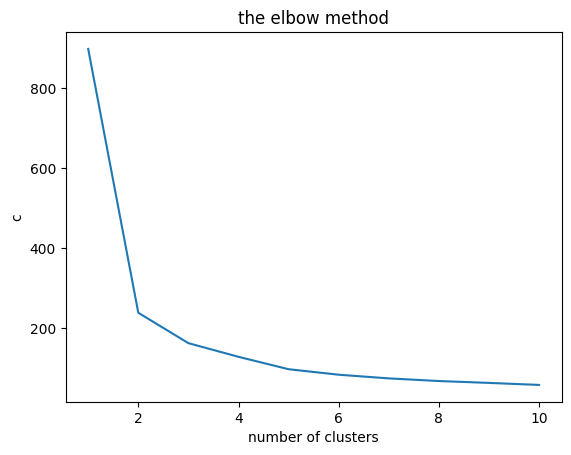

In [ ]:
#elbow method to find optimal numbers of cluster
from sklearn.cluster import KMeans
c = []
for i in range(1,11):
  km = KMeans(n_clusters=i, init = 'k-means++', n_init=10, max_iter = 300, random_state=0)
  km.fit(x)
  c.append(km.inertia_)
plt.plot(range(1,11),c)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('c')
plt.show()